In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from plotly import express as px
import os

In [185]:
# Data Loading

In [186]:
df=pd.read_csv("AB_NYC_2019.csv")

In [187]:
df.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [188]:
df.shape

(48895, 16)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [190]:
#Checking Null Values

In [191]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [192]:
# Missing Values are found on this , Hence we will impute NA

In [193]:
df['Name'] = df['name'].fillna('NA')
df['host_name'] = df['host_name'].fillna('NA')
df['reviews_per_month'] = df['reviews_per_month'].fillna(-1)

In [194]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [195]:
# Columns that are not significant for analysis such as id, name, host_id, host_name will be dropped

In [196]:
df = df.drop(columns=['id', 'name', 'host_id', 'host_name','last_review'])

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  Name                            48895 non-null  object 
dtypes: float64(3), int64(5), object(

In [198]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [199]:
# Descriptive Statistics

In [200]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,48895.0,0.885327,1.778536,-1.00000,0.04000,0.37000,1.580000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [201]:
# Removing Duplicates

In [202]:
df.drop_duplicates(inplace=True)

In [203]:
# Checking for Unwanted Values in the each Columns

In [204]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [205]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [206]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [207]:
df['price'].unique()

array([  149,   225,   150,    89,    80,   200,    60,    79,   135,
          85,   120,   140,   215,    99,   190,   299,   130,   110,
          44,   180,    50,    52,    55,    70,    35,    40,    68,
         115,   151,   228,   144,    69,    49,   375,   250,   275,
         230,    51,    65,   105,    95,   145,   285,    94,   800,
         131,    98,   100,   125,   175,   500,   101,   220,    59,
         350,   199,   325,   235,   170,   400,    75,    90,   185,
          77,    76,   160,   195,   156,   219,   475,   165,   196,
          83,   123,   265,   249,   121,    45,    71,    64,   159,
         189,   239,   305,   155,    92,    36,    37,   205,    39,
         390,   129,   212,   124,   122,   109,   575,   229,   169,
         113,   179,   349,   139,   650,    67,   599,   211,   290,
          87,   395,   260,    97,   132,   141,   495,   259,    96,
         295,   451,   300,    42,   255,    72,    88,   450,   198,
          46,    33,

In [208]:
df['minimum_nights'].unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

In [209]:
df['number_of_reviews'].unique()

array([  9,  45,   0, 270,  74,  49, 430, 118, 160,  53, 188, 167, 113,
        27, 148, 198, 260, 130,  39,  71,  88,  19,  58, 108,  29, 242,
       197, 273, 168, 231, 214, 245,  15,  25,  81,  97,  11, 248,  61,
       135, 112,  73,  82, 328, 105, 289, 138,  21,  42,   5,  66, 143,
       191,   4, 338, 106, 190,  23, 142,  54,  70,  16,  94, 194,   2,
       174,  24, 166,   1,  30, 139, 233,  68,  46, 335, 162, 170, 334,
        12, 467,   7,  38, 324, 115, 354, 195,  13,  36,  63, 155, 193,
        32,  50,  26, 426, 227,  84,   3,  10, 124, 240, 200,  79,  34,
       134, 126, 234, 202,  28, 309,  14,  80, 294, 150,  47, 219, 114,
       213,  86,  18, 206, 122,  33,  52,  51, 199,  41, 109, 151, 285,
       375,   6, 358, 226, 104, 204, 253, 129,  37,  69, 192,  17, 222,
       205, 458, 183, 189, 127,  35, 171,  92, 238,  56, 111, 147, 177,
       185,  62, 181, 333, 441, 279, 203, 210,  64, 132,  20,  67, 187,
        22,  93,  48, 120,  43,  59,  31, 220, 286, 398,  76, 18

In [210]:
df['Name'].unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Sunny Studio at Historical Neighborhood',
       '43rd St. Time Square-cozy single bed',
       "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object)

In [211]:
df['Name'].mode()

,Name
0,Hillside Hotel


In [212]:
# Correcting Data

In [213]:
df['Name'] = df['Name'].str.replace('NA', 'Hillside Hotel')

In [214]:
df['Name'] = df['Name'].str.replace('THE VILLAGE OF HARLEMHillside Hotel.NEW YORK !', 'THE Village of HarlemHillside Hotel New York')

In [215]:
df['Name'].unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Sunny Studio at Historical Neighborhood',
       '43rd St. Time Square-cozy single bed',
       "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object)

In [216]:
# Outlier Treatment

In [217]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45923 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             45923 non-null  object 
 1   neighbourhood                   45923 non-null  object 
 2   latitude                        45923 non-null  float64
 3   longitude                       45923 non-null  float64
 4   room_type                       45923 non-null  object 
 5   price                           45923 non-null  int64  
 6   minimum_nights                  45923 non-null  int64  
 7   number_of_reviews               45923 non-null  int64  
 8   reviews_per_month               45923 non-null  float64
 9   calculated_host_listings_count  45923 non-null  int64  
 10  availability_365                45923 non-null  int64  
 11  Name                            45923 non-null  object 
dtypes: float64(3), int64(5), object(4)
me

In [220]:
# Data Visulization

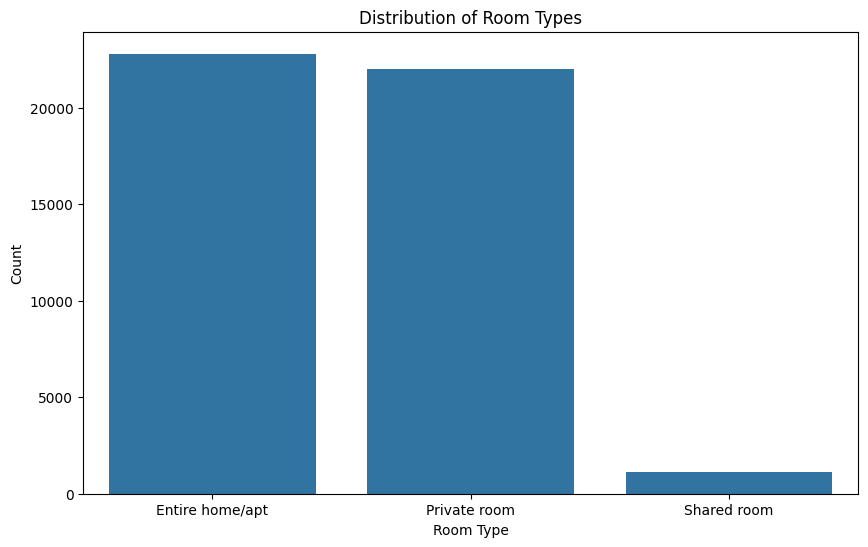

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for room types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


In [222]:
# Entire Home has most number of Counts

In [223]:
# Distribution of Prices

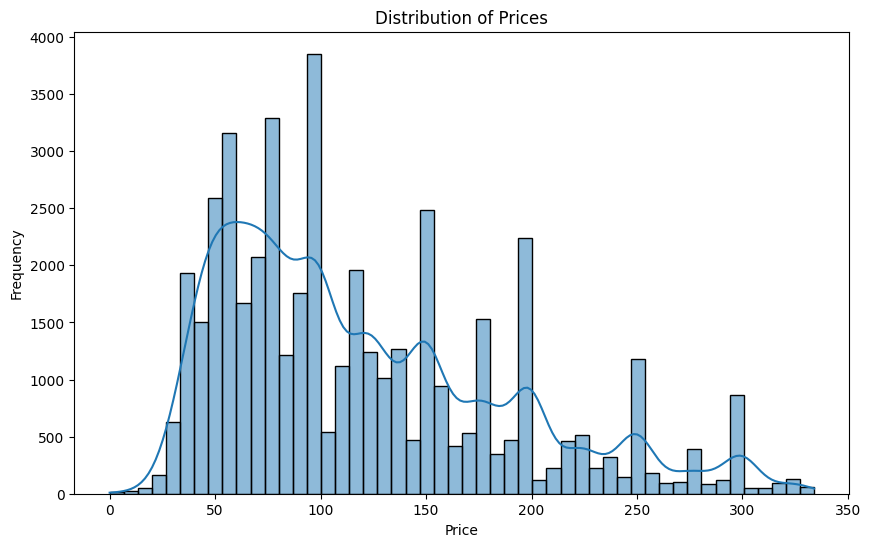

In [224]:
# Histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [225]:
# The Distribution of Price is Left Screwed

In [227]:
# Pie chart of neighbourhood group distribution

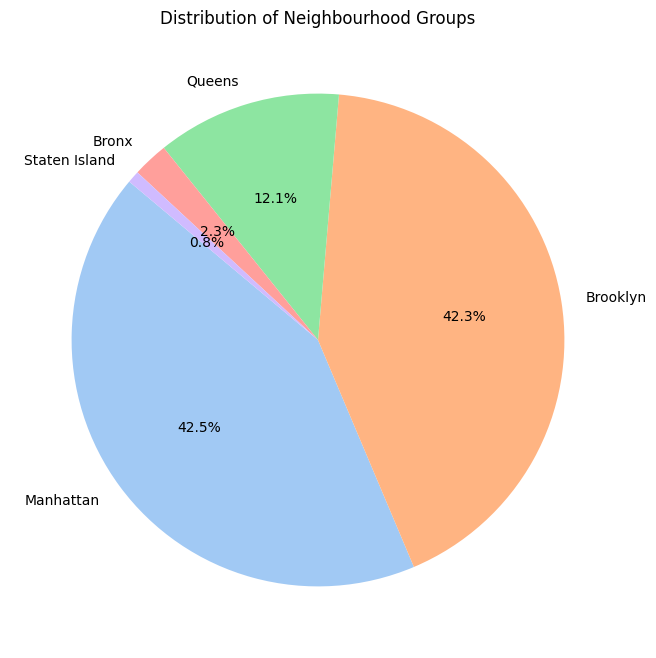

In [228]:
plt.figure(figsize=(8, 8))
neighbourhood_counts = df['neighbourhood_group'].value_counts()
plt.pie(neighbourhood_counts, labels=neighbourhood_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Neighbourhood Groups')
plt.show()